# What is Feature Scaling?

#### Feature scaling is a technique to standardize the independent features present in the data in a fixed range

# Why do we need Feature Scaling?

# Types of feature Scaling

## 1. Standardization        (z-score Normalization)        
## 2.Normalization

# 1. Standardization

### Mean = 0 , Standard deviation = 1

## Example 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\hp\\Desktop\\data\\Social_Network_Ads.csv')


In [3]:
df = df.iloc[:,2:]

In [4]:
df.sample(3)

,Age,EstimatedSalary,Purchased
273,39,106000,1
4,19,76000,0
36,33,28000,0


#### train_test_split

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis = 1),
                                                 df['Purchased'],test_size=0.2,
                                                 random_state=0)
x_train.shape,x_test.shape

((320, 2), (80, 2))

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fit the scaler to the train set , it will learn the parameters
sc.fit(x_train)

#transform train and test sets
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)

In [7]:
sc.mean_

array([3.8218750e+01, 6.9928125e+04])

In [8]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns= x_test.columns)

In [9]:
x_train.describe().round()

,Age,EstimatedSalary
count,320.0,320.0
mean,38.0,69928.0
std,10.0,34570.0
min,18.0,15000.0
25%,30.0,43000.0
50%,38.0,69500.0
75%,46.0,88000.0
max,60.0,150000.0


In [10]:
x_train_scaled.describe().round()

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,1.0
max,2.0,2.0


## Effect of Scaling

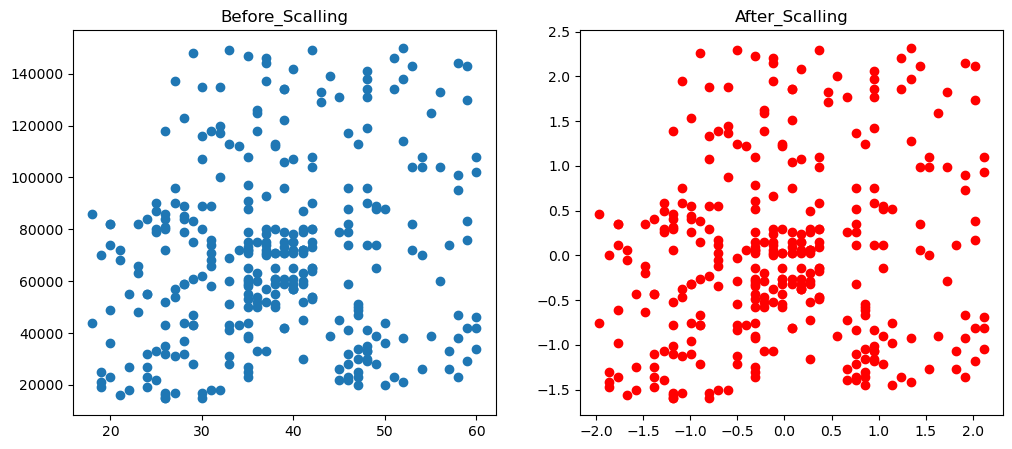

In [15]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train["Age"],x_train["EstimatedSalary"])
ax1.set_title("Before_Scalling")
ax2.scatter(x_train_scaled["Age"],x_train_scaled["EstimatedSalary"],color="red")
ax2.set_title("After_Scalling")

plt.show()

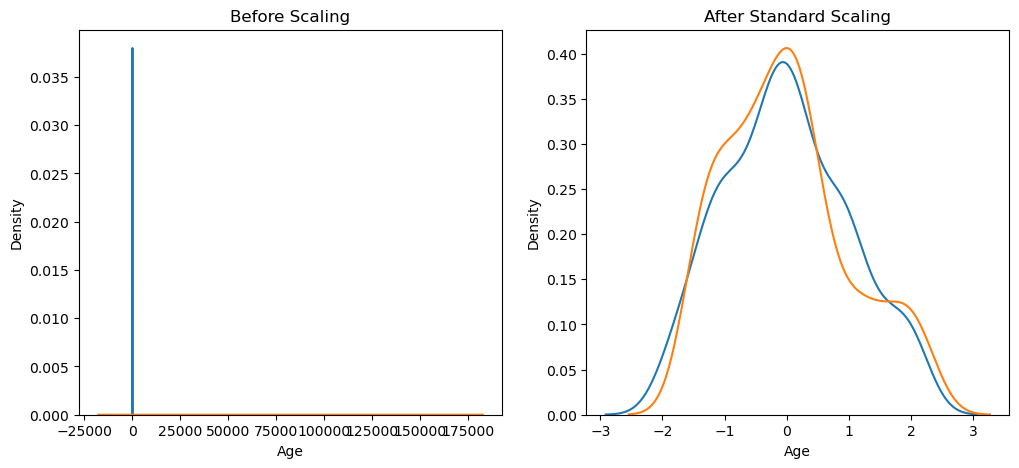

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Comparison of Distributions

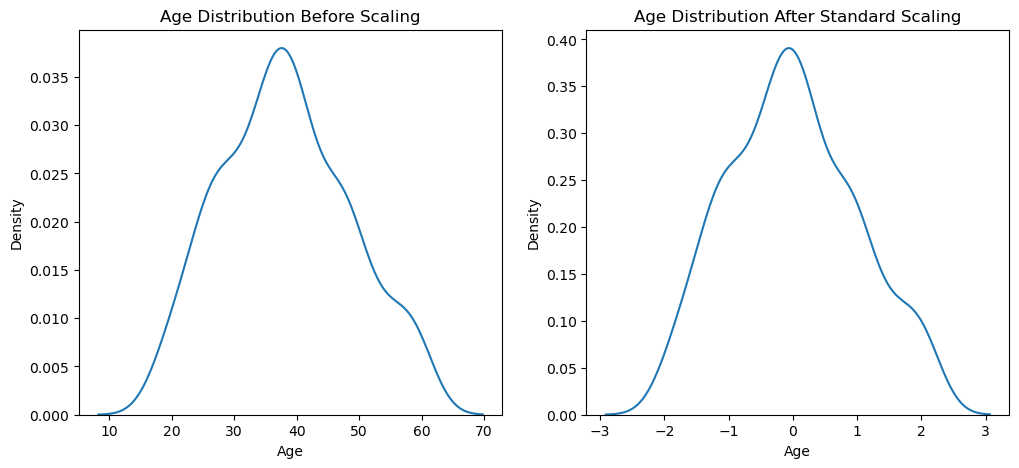

In [17]:
fig ,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling 
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

#after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

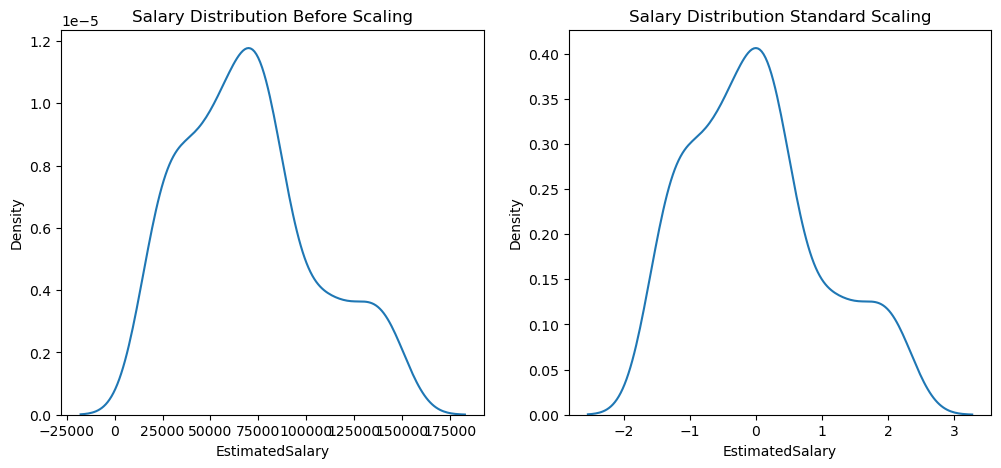

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Why scaling is important?

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [23]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [29]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.725
Scaled 0.925


In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [35]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [36]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.9
Scaled 0.9


## Effect of Outlier

In [42]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000]}))
df

C:\Users\hp\AppData\Local\Temp\ipykernel_9024\2161867650.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000]}))


,Age,EstimatedSalary,Purchased
0,19,19000,0.0
1,35,20000,0.0
2,26,43000,0.0
3,27,57000,0.0
4,19,76000,0.0
...,...,...,...
1,90,250000,NaN
2,95,350000,NaN
0,5,1000,NaN
1,90,250000,NaN


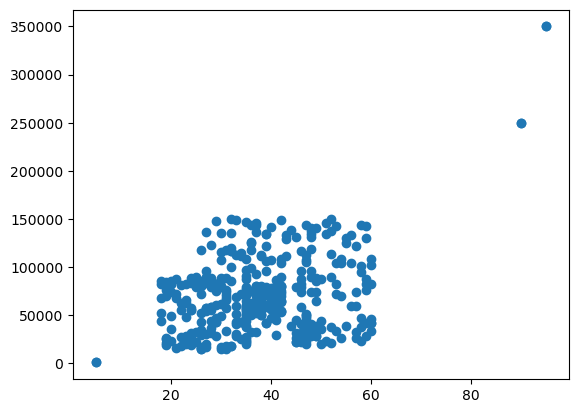

In [43]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((284, 2), (122, 2))

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

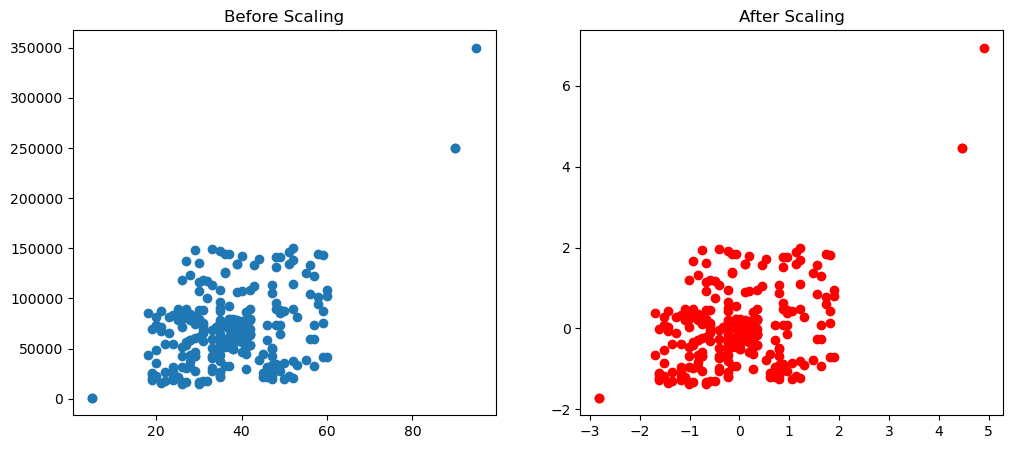

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()